In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
color_blue = "#1a559e"
color_blue_vivid = "#0070c0"
color_blue_light = "dodgerblue"
color_pink = "#e71d71"
color_black = "black"
color_gold = "#FFD700"
color_orange = "orange"
color_red = "darkred"


In [3]:
# create two dimensional correlated data
np.random.seed(0)
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=500)
data = pd.DataFrame(data, columns=['x', 'j'])
data.head()


,x,j
0,-4.043801,-1.574511
1,-3.146465,0.932162
2,-3.654563,-2.919911
3,-2.013850,-1.176148
4,0.042516,0.480321


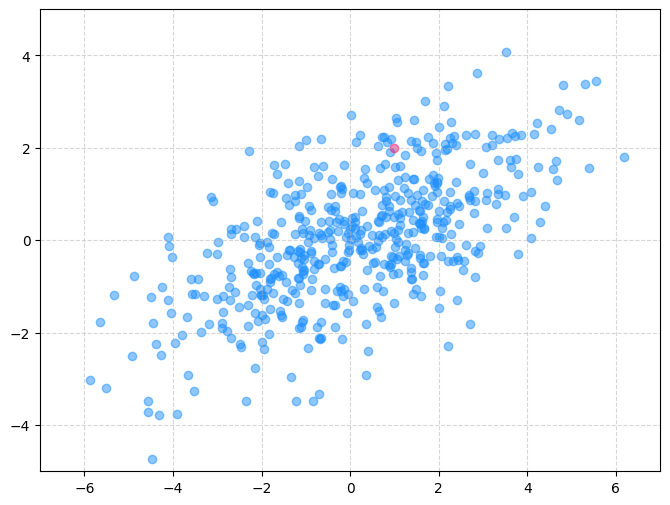

In [4]:
# plot the data
new_data = [1,2]
figsize = (8, 6)

plt.figure(figsize=figsize)
plt.scatter(data['x'], data['j'], alpha=0.5, color=color_blue_light)
plt.scatter(new_data[0], new_data[1], alpha=0.5, color=color_pink)
plt.xlim(-7, 7)
plt.ylim(-5, 5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [5]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)
new_data_standardized = scaler.transform([new_data])
new_data_standardized = new_data_standardized[0]

c:\Users\vinor\Desktop\Develhope\projects\EDU-PCA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


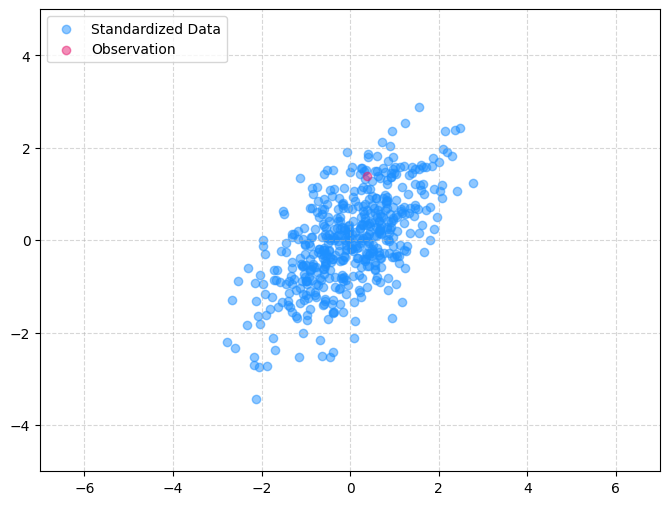

In [6]:

plt.figure(figsize=figsize)
plt.scatter(data_standardized[:,0], data_standardized[:,1], alpha=0.5, color=color_blue_light, label='Standardized Data')
plt.scatter(new_data_standardized[0], new_data_standardized[1], alpha=0.5, color=color_pink, label='Observation')
plt.xlim(-7, 7)
plt.ylim(-5, 5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')
plt.show()


In [7]:
# Plot first principal component
pca = PCA(n_components=2)
pca.fit(data_standardized)

first_pc = pca.components_[0]
second_pc = pca.components_[1]



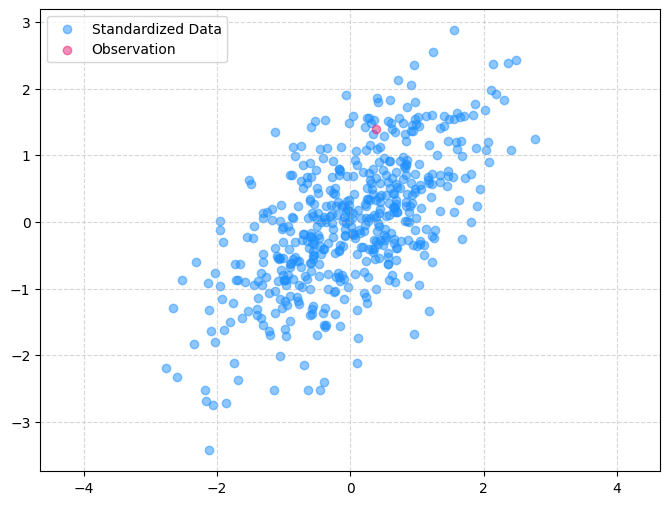

In [8]:
plt.figure(figsize=figsize)

plt.scatter(data_standardized[:,0], data_standardized[:,1], alpha=0.5, color=color_blue_light, label='Standardized Data')
plt.scatter(new_data_standardized[0], new_data_standardized[1], alpha=0.5, color=color_pink, label='Observation')
xlim = [-4, 4]
ylim = [-4, 4]
# plt.plot([first_pc[0]*xlim[0], first_pc[0]*xlim[1]], [first_pc[1]*xlim[0], first_pc[1]*ylim[1]], color=color_orange, lw=1)

plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')
plt.show()


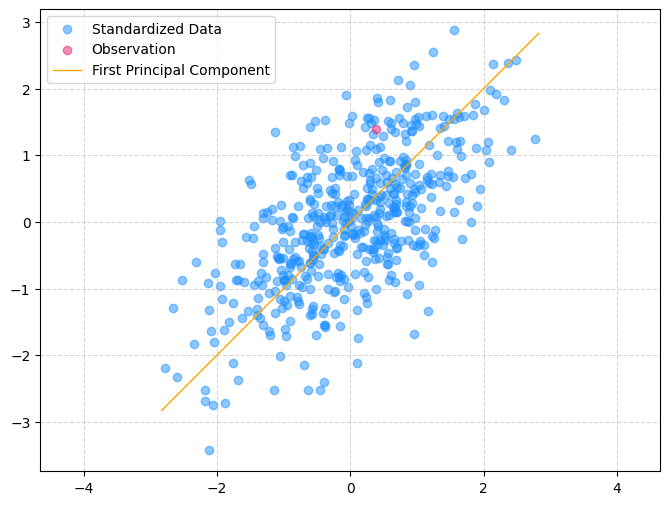

In [9]:
plt.figure(figsize=figsize)

plt.scatter(data_standardized[:,0], data_standardized[:,1], alpha=0.5, color=color_blue_light, label='Standardized Data')
plt.scatter(new_data_standardized[0], new_data_standardized[1], alpha=0.5, color=color_pink, label='Observation')
plt.plot([first_pc[0]*xlim[0], first_pc[0]*xlim[1]], [first_pc[1]*xlim[0], first_pc[1]*ylim[1]], color=color_orange, lw=1, label='First Principal Component')

plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

plt.show()



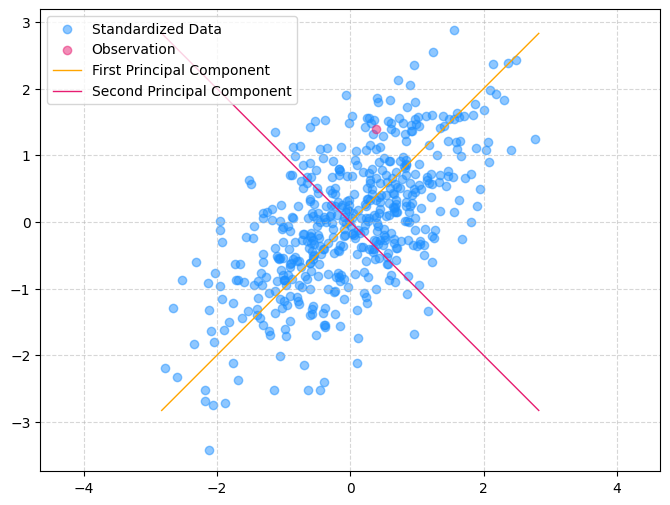

In [10]:
plt.figure(figsize=figsize)

plt.scatter(data_standardized[:,0], data_standardized[:,1], alpha=0.5, color=color_blue_light, label='Standardized Data')
plt.scatter(new_data_standardized[0], new_data_standardized[1], alpha=0.5, color=color_pink, label='Observation')
plt.plot([first_pc[0]*xlim[0], first_pc[0]*xlim[1]], [first_pc[1]*xlim[0], first_pc[1]*ylim[1]], color=color_orange, lw=1, label='First Principal Component')
plt.plot([second_pc[0]*xlim[0], second_pc[0]*xlim[1]], [second_pc[1]*xlim[0], second_pc[1]*ylim[1]], color=color_pink, lw=1, label='Second Principal Component')

plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

plt.show()


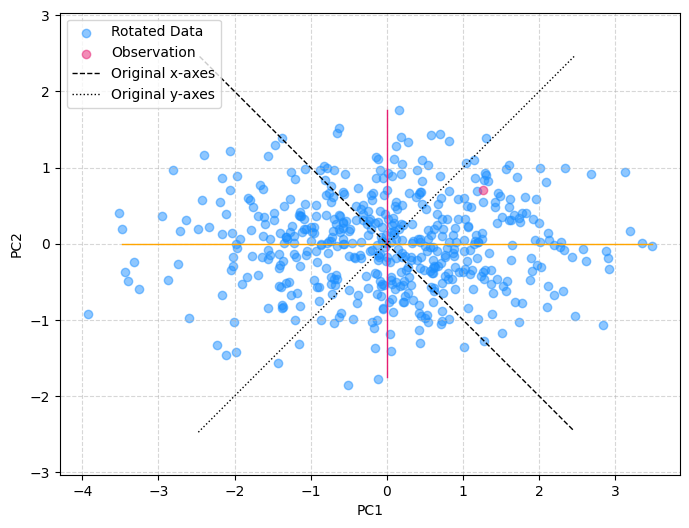

In [11]:
# Rotate the data
data_rotated = np.dot(data_standardized, pca.components_.T)

plt.figure(figsize=figsize)

plt.scatter(data_rotated[:,0], data_rotated[:,1], alpha=0.5, color=color_blue_light, label='Rotated Data')

new_data_rotated = np.dot(new_data_standardized.reshape(1, -1), pca.components_.T)
plt.scatter(new_data_rotated[0, 0], new_data_rotated[0, 1], alpha=0.5, color=color_pink, label='Observation')

plt.axis('equal')

max_x = max(data_rotated[:,0])
max_y = max(data_rotated[:,1])

# plot first principal component
plt.plot([-max_x, max_x], [0, 0], color=color_orange, lw=1)
# plot second principal component
plt.plot([0, 0], [-max_y, max_y], color=color_pink, lw=1)

# Original x-axis direction in PCA space
x_direction = np.dot(pca.components_, [1, 0])
plt.plot([-max_x*x_direction[0], max_x*x_direction[0]], 
         [-max_x*x_direction[1], max_x*x_direction[1]], 
         'black', linestyle='--',label= 'Original x-axes', lw=1)

# Original y-axis direction in PCA space
y_direction = np.dot(pca.components_, [0, 2])
plt.plot([-max_y*y_direction[0], max_y*y_direction[0]], 
         [-max_y*y_direction[1], max_y*y_direction[1]], 
         'black', linestyle='dotted', label= 'Original y-axes', lw=1)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

plt.show()
